In [1]:
import pandas as pd

df = pd.read_csv('./data/cleaned_data.csv')
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Tech Support,Churn Value,Bank transfer (automatic),Credit card (automatic),Mailed check
0,1,0,0,0,-1.236724,1,0,0,1,0,0,1
1,0,0,0,1,-1.236724,1,0,0,1,0,0,0
2,0,0,0,1,-0.992402,1,1,0,1,0,0,0
3,0,0,1,1,-0.177995,1,1,1,1,0,0,0
4,1,0,0,1,0.677133,1,1,0,1,1,0,0


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [4]:
df.shape

(7043, 12)

In [10]:
models = {
    'Logistic Regression': LogisticRegression(n_jobs=-1),
    'SVC': SVC(probability=True),
    'Random Forest': RandomForestClassifier(n_jobs=-1),
}

In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn Value'])
y = df['Churn Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
def test_model(model, X, y):
    from sklearn.metrics import (
        classification_report,
        roc_curve,
        roc_auc_score,
        RocCurveDisplay,
        average_precision_score,
        precision_recall_curve,
        PrecisionRecallDisplay,
        f1_score,
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"Classification Report")
    print(classification_report(y_test, y_pred))

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"ROC AUC Score: {roc_auc:.2f}")
    RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

    pr_auc = average_precision_score(y_test, y_pred)
    print(f"Precision Score: {pr_auc}")
    precision, recall, pre_thresholds = precision_recall_curve(y_test, y_prob)
    PrecisionRecallDisplay(precision=precision, recall=recall).plot()

    print(f"F1 Score: {f1_score(y_test, y_pred)}")

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1009
           1       0.67      0.48      0.56       400

    accuracy                           0.78      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.77      0.78      0.77      1409

ROC AUC Score: 0.82
Precision Score: 0.4672220106011802
F1 Score: 0.5568513119533528


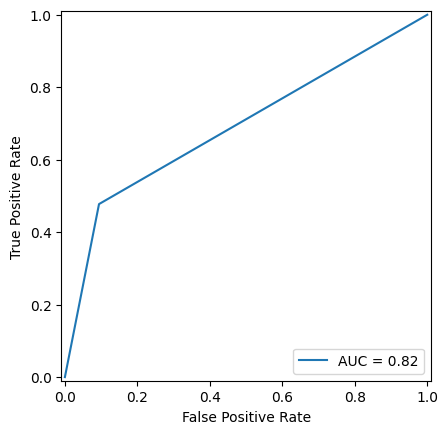

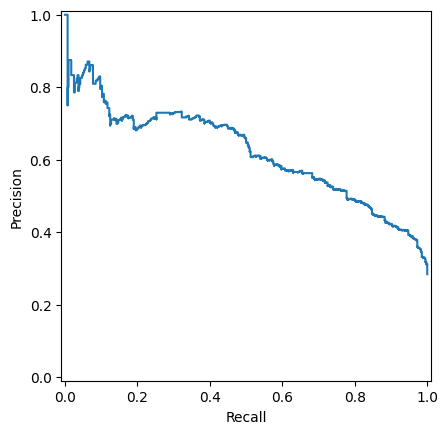

In [26]:
test_model(models['Logistic Regression'], X, y)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1009
           1       0.68      0.43      0.53       400

    accuracy                           0.78      1409
   macro avg       0.74      0.68      0.69      1409
weighted avg       0.77      0.78      0.76      1409

ROC AUC Score: 0.77
Precision Score: 0.4553089549044127
F1 Score: 0.5276073619631901


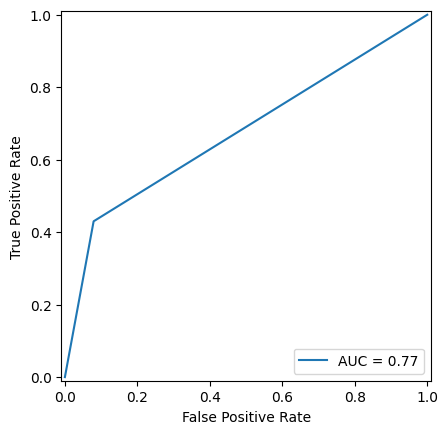

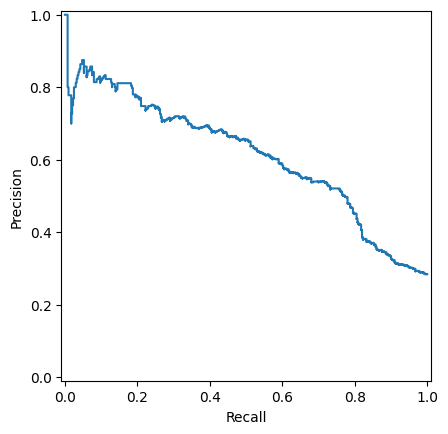

In [27]:
test_model(models['SVC'], X, y)

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1009
           1       0.53      0.46      0.49       400

    accuracy                           0.73      1409
   macro avg       0.66      0.65      0.65      1409
weighted avg       0.72      0.73      0.72      1409

ROC AUC Score: 0.75
Precision Score: 0.3963582959768198
F1 Score: 0.49267643142476697


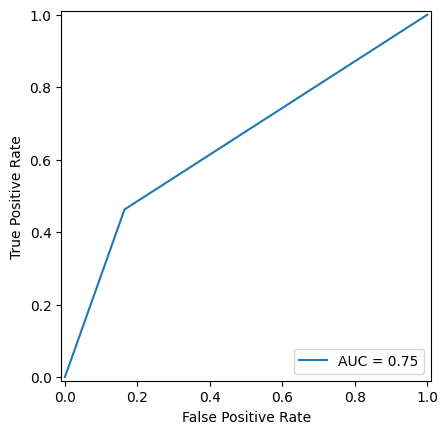

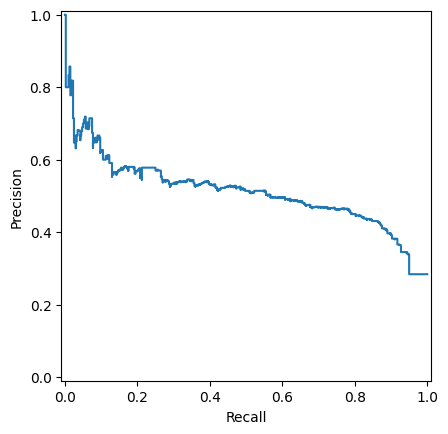

In [28]:
test_model(models['Random Forest'], X, y)